In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.sum(np.array([1,2,3]))

6

In [36]:
def obj_func(m):
    #u, s, vh = np.linalg.svd(m)

    return np.linalg.norm(m,'nuc')#np.sum(s)

def comp_grad(m, boolMask, obj_func, n):
    """ Computes gradient that maximizes the objective function """
    epsilon = 1e-3

    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))

    return grad

def comp_hessian(m, boolMask, of, n):
    """ Computes hessian (only diagonal) """
    vector = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                vector.append(m[i,j])

    q = len(vector)

    epsilon = 1e-3
    hessian = np.zeros([q, q])

    # fill in the diagonal first
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:

                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian[count,count] = (of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2

                count = count + 1
                
    # now fill in off-diagonals
    count1 = 0
    for i1 in range(n):
        for j1 in range(n):
            if boolMask[i1,j1]: # found one
                diff1 = np.zeros([n,n])
                diff1[i1,j1] = epsilon

                count2 = 0
                for i2 in range(n):
                    for j2 in range(n):
                        if boolMask[i2,j2]: # found another one
                            diff2 = np.zeros([n,n])
                            diff2[i2,j2] = epsilon

                            if count1 != count2: # doing only off-diagonal ones
                                hessian[count1,count2] = (of(m + diff1 + diff2) + of(m - diff1 - diff2)
                                                         - of(m + diff1 - diff2) - of(m - diff1 + diff2))/(2*epsilon)**2

                            count2 = count2 + 1

                count1 = count1 + 1

    return hessian

In [40]:
n = 10
p = 0.5
rank = 1

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))

In [46]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]

print("step, nuc norm, frob distance, hessian cond")#, grad mean, grad std, grad min, grad max")
nuc_norms = []
frob_norms = []
conds = []

for step in range(10000):

    hessian = comp_hessian(current_point, boolMask, obj_func, n)
    grad = comp_grad(current_point, boolMask, obj_func, n)

    #descent = -np.dot(np.linalg.inv(hessian), grad)
    descent = -np.array(grad)
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    current_point = current_point + 0.1*descent_matrix
    
    nuc_norms.append(np.linalg.norm(current_point,'nuc'))
    frob_norms.append(np.linalg.norm(current_point-original,'fro'))
    conds.append(np.linalg.cond(hessian))
    
    if step % 20 == 0:
        print(step, np.linalg.norm(current_point,'nuc'), np.linalg.norm(current_point-original,'fro'),
              np.linalg.cond(hessian))#, np.mean(np.abs(grad)),
             # np.std(np.abs(grad)), np.min(np.abs(grad)), np.max(np.abs(grad)))
    

step, nuc norm, frob distance, hessian cond
0 12.576245399899575 5.32857363043193 15846341.528779637
20 10.766396094644678 4.07343606493013 2366122.149329953
40 10.055027801347126 3.1386743535359716 337977.9584257657
60 9.631876805911457 2.372483186798418 57295210.563796416
80 9.37029505023422 1.7087330623323695 490841.3257323404
100 9.20672065887661 1.1454316540417997 574498.8841572567
120 9.090581286225152 0.6562840700547886 10148901.985396292
140 9.039307783127141 0.2900956048262491 246246.46730709696
160 9.007739761613134 0.18231328264890564 271944.40019509423
180 9.004909152930146 0.1757663204842153 1432571.4054404811
200 9.05052061832226 0.2136910744903581 1049880.9991168818
220 8.974792798284186 0.17231414942095383 1229436.8521241501
240 8.969742018148 0.16177017224338536 256330.45002743867
260 9.033818650388781 0.1688079186995928 383355.0686415093
280 9.00995458867714 0.19323392151023752 115377.82591858429
300 9.052451252107984 0.19755529857328274 265464.99077438115
320 9.00555

KeyboardInterrupt: 

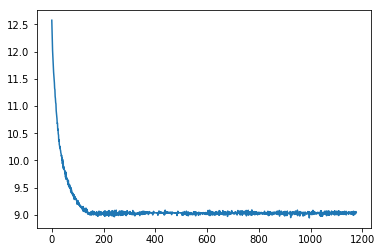

In [47]:
plt.plot(nuc_norms)

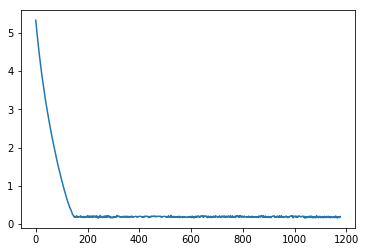

In [48]:
plt.plot(frob_norms)

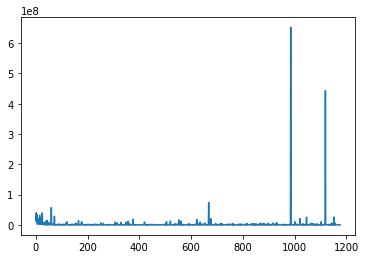

In [49]:
plt.plot(conds)

(array([1.125e+03, 2.800e+01, 8.000e+00, 5.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

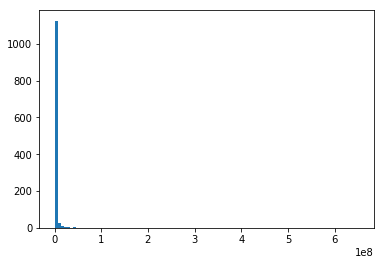

In [50]:
plt.hist(conds,100)